In [1]:
import tensorflow as tf
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import os
from ipywidgets import interact,fixed, interact_manual, IntSlider
import ipywidgets as widgets


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
y_train_enc = to_categorical(y_train)
y_test_enc = to_categorical(y_test)
x_test_norm = x_test.astype('float32') / 255.0
x_test_norm = x_test_norm.reshape((x_test_norm.shape[0], 28, 28, 1))

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization
from keras.optimizers import SGD
model = Sequential([Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)), MaxPooling2D(2, 2), Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'), Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'), MaxPooling2D(2, 2), Flatten(), Dense(100, activation='relu', kernel_initializer='he_uniform'), BatchNormalization(), Dense(10, activation='softmax')])
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.9), metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 9, 9, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │         102,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 159,654 (623.65 KB)

 Trainable params: 159,454 (622.87 KB)

 Non-trainable params: 200 (800.00 B)

In [7]:
x_train_norm = x_train.astype('float32') / 255.0
x_test_norm = x_test.astype('float32') / 255.0

In [8]:
x_train_norm = x_train_norm.reshape((x_train_norm.shape[0], 28, 28, 1))
x_test_norm = x_test_norm.reshape((x_test_norm.shape[0], 28, 28, 1))
from sklearn.model_selection import train_test_split as tts
x_val, x_test_, y_val_raw, y_test_raw = tts(x_test_norm, y_test, test_size=0.5)
y_val = to_categorical(y_val_raw, 10)
y_test_ = to_categorical(y_test_raw, 10)
print(x_train_norm.shape)
print(x_test_norm.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test_.shape)
print(y_test_.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(5000, 28, 28, 1)
(5000, 10)
(5000, 28, 28, 1)
(5000, 10)


In [9]:
history = model.fit(x=x_train_norm, y=y_train_enc, validation_data=(x_val, y_val), batch_size=64, epochs=15)


Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9235 - loss: 0.2554 - val_accuracy: 0.9768 - val_loss: 0.0744
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9857 - loss: 0.0478 - val_accuracy: 0.9906 - val_loss: 0.0369
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9903 - loss: 0.0326 - val_accuracy: 0.9856 - val_loss: 0.0442
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9925 - loss: 0.0266 - val_accuracy: 0.9894 - val_loss: 0.0356
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9950 - loss: 0.0187 - val_accuracy: 0.9926 - val_loss: 0.0242
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9962 - loss: 0.0131 - val_accuracy: 0.9924 - val_loss: 0.0227
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9965 - loss: 0.0116 - val_accuracy: 0.9928 - val_loss: 0.0250
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9981 - loss: 0.0078 - 

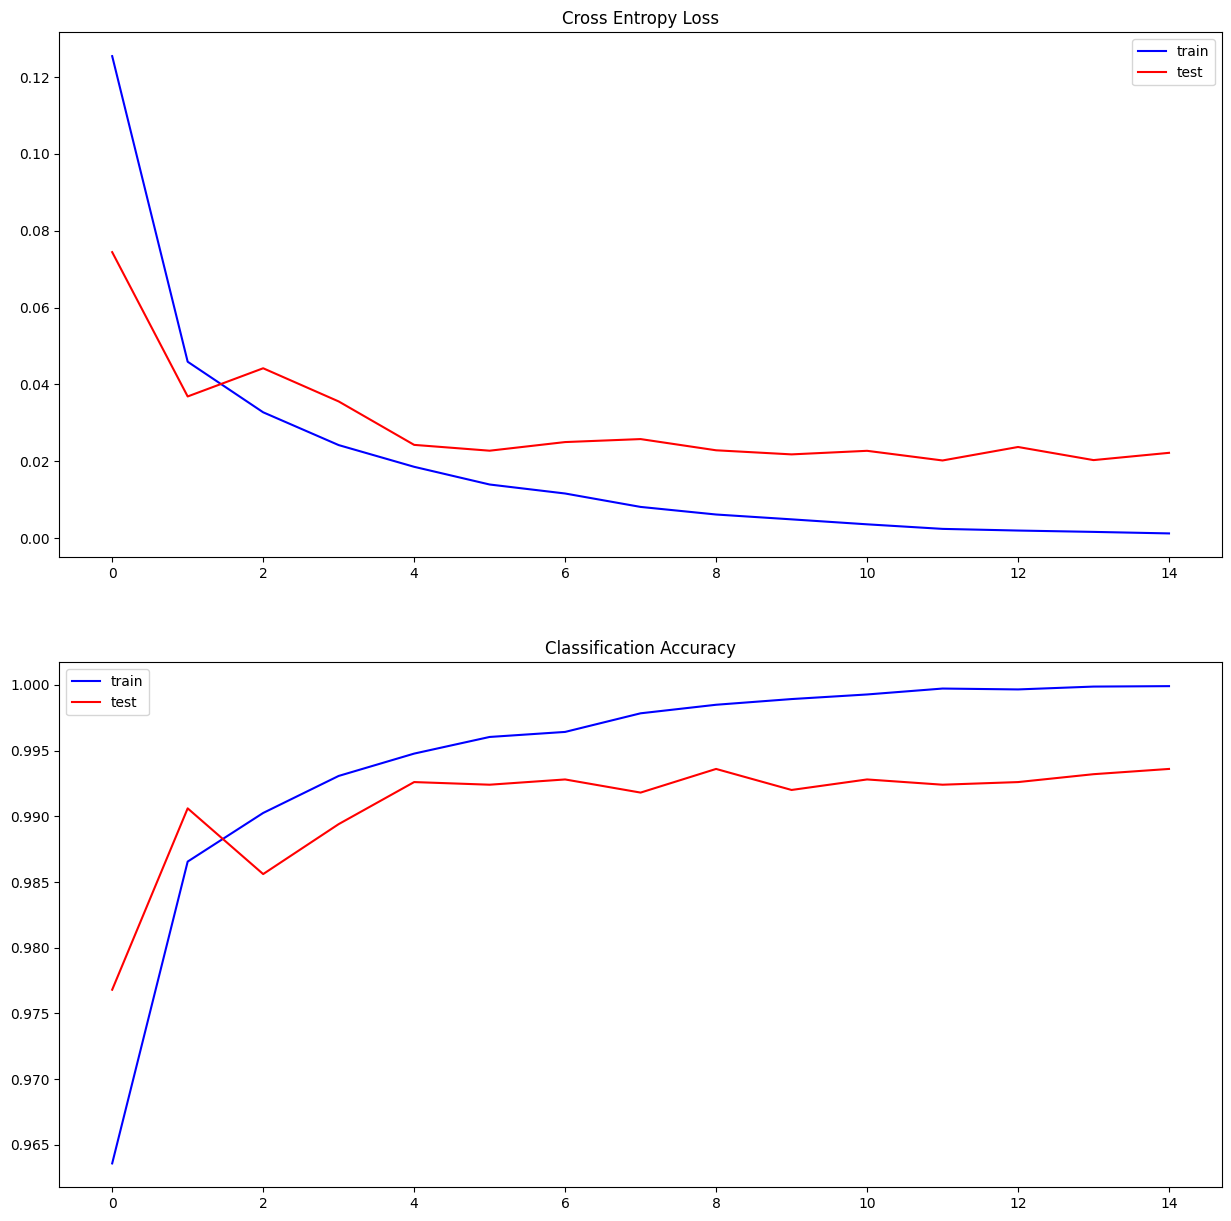

In [10]:
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
accuracy = history.history['accuracy']
fig = plt.figure(figsize=(15, 15))
fig.add_subplot(2, 1, 1)
plt.title('Cross Entropy Loss')
plt.plot(loss, color='blue', label='train')
plt.plot(val_loss, color='red', label='test')
plt.legend()
fig.add_subplot(2, 1, 2)
plt.title('Classification Accuracy')
plt.plot(accuracy, color='blue', label='train')
plt.plot(val_accuracy, color='red', label='test')
plt.legend()

In [13]:
metrics = model.evaluate(x_test_, y_test_)
print("Test Accuracy is : {:.2f}".format(metrics[1] * 100))
print("Test Loss is : {:.2f}".format(metrics[0]))
model.save('my_model.keras')
loaded_model = tf.keras.models.load_model('my_model.keras')
metrics = loaded_model.evaluate(x_test_, y_test_)
print("Test Accuracy is : {:.2f}".format(metrics[1] * 100))
print("Test Loss is : {:.2f}".format(metrics[0]))

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9923 - loss: 0.0256
Test Accuracy is : 99.06
Test Loss is : 0.03
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9923 - loss: 0.0256
Test Accuracy is : 99.06
Test Loss is : 0.03


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


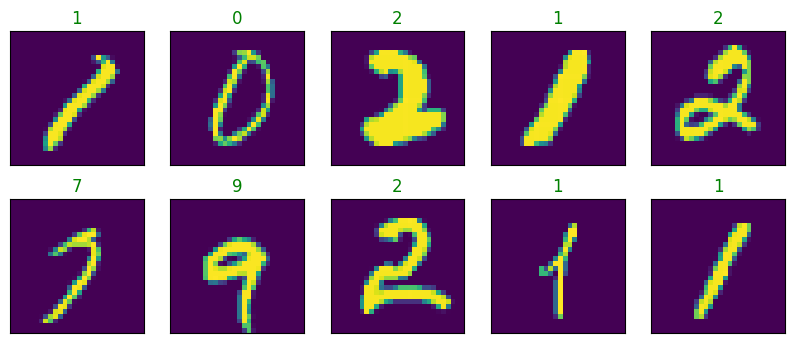

In [14]:
def test_images(n=10):
    index = np.random.randint(low=0, high=5000, size=n)
    fig = plt.figure(figsize=(n, 4))
    for i in range(n):
        [pred] = model.predict(x_test_[index[i]].reshape(1, 28, 28, 1))
        pred = np.argmax(pred)
        actual = np.argmax(y_test_[index[i]])
        fig.add_subplot(2, n//2, i + 1)
        plt.xticks([])
        plt.yticks([])
        if actual == pred:
            plt.title(pred, color='green')
        else:
            plt.title(pred, color='red')
        plt.imshow(x_test_[index[i]].reshape(28, 28))
test_images(10)

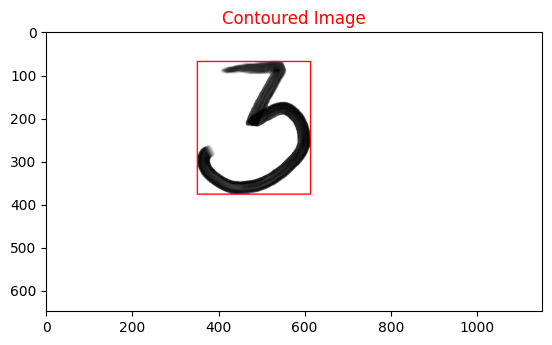

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
The Recognized Numbers are: 3


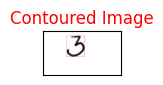

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
The Recognized Numbers are: 3


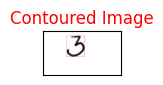

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
The Recognized Numbers are: 3


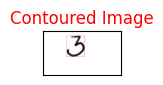

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
The Recognized Numbers are: 3


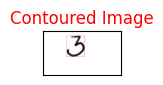

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
The Recognized Numbers are: 3


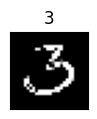

In [19]:
import cv2
def number_recognize(filepath):
    image = cv2.imread(r"D:\Untitled.png")
    image = cv2.medianBlur(image, 7)
    grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.adaptiveThreshold(grey, 200, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 33, 25)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    preprocessed_digits = []
    boundingBoxes = [cv2.boundingRect(c) for c in contours]
    (contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes), key=lambda b: b[1][0], reverse=False))
    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        cv2.rectangle(image, (x, y), (x + w, y + h), color=(255, 0, 0), thickness=2)
        digit = thresh[y:y + h, x:x + w]
        resized_digit = cv2.resize(digit, (18, 18))
        padded_digit = np.pad(resized_digit, ((5, 5), (5, 5)), "constant", constant_values=0)
        preprocessed_digits.append(padded_digit)
    plt.imshow(image, cmap="gray")
    plt.title("Contoured Image", color='red')
    plt.show()
    inp = np.array(preprocessed_digits)
    figr = plt.figure(figsize=(len(inp), 4))
    nums = []
    for i, digit in enumerate(preprocessed_digits):
        [prediction] = loaded_model.predict(digit.reshape(1, 28, 28, 1) / 255.)
        pred = np.argmax(prediction)
        nums.append(pred)
        figr.add_subplot(1, len(inp), i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(digit.reshape(28, 28), cmap="gray")
        plt.title(pred)
    print("The Recognized Numbers are:", *nums)

number_recognize('2.jpg')
number_recognize('3.jpg')
number_recognize('4.jpg')
number_recognize('5.jpg')
number_recognize('6.jpg')

In [17]:
!pip install opencv-python


   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB 660.6 kB/s eta 0:00:59
   ---------------------------------------- 0.1/39.0 MB 653.6 kB/s eta 0:01:00
   ---------------------------------------- 0.1/39.0 MB 944.1 kB/s eta 0:00:42
   ---------------------------------------- 0.2/39.0 MB 1.1 MB/s eta 0:00:34
   ---------------------------------------- 0.4/39.0 MB 1.8 MB/s eta 0:00:23
    --------------------------------------- 0.8/39.0 MB 2.7 MB/s eta 0:00:15
   - -------------------------------------- 1.1/39.0 MB 3.3 MB/s eta 0:00:12
   - -------------------------------------- 1.9/39.0 MB 5.0 MB/s eta 0:00:08
   -- ------------------------------------- 2.7/39.0 MB 6.3 MB/s eta 0:00:06
   --- ------------------------------------ 3.5/39.0 MB 7.5 MB/s eta 0:00:05
   --- ------------------------------------ 3.7/39.0 MB 7.6 MB/s eta 0:00:05
   ----


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
